# NN Moons Dataset Classification

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [2]:
X_train = np.loadtxt("data-moons/x_train.csv")
y_train = np.loadtxt("data-moons/y_train.csv")

In [3]:
y_train = y_train.reshape(1, y_train.shape[0])

In [4]:
print(X_train.shape)
print(y_train.shape)

(2, 300)
(1, 300)


# Binary Neural Net

In [5]:
moons_nn = MultiLayerNN(X = X_train, Y = y_train)

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167845
Cost after epoch 2000: 0.141316
Cost after epoch 3000: 0.138788
Cost after epoch 4000: 0.136066
Cost after epoch 5000: 0.134240
Cost after epoch 6000: 0.131127
Cost after epoch 7000: 0.130216
Cost after epoch 8000: 0.129623
Cost after epoch 9000: 0.129118
Cost after epoch 10000: 0.128784
Cost after epoch 11000: 0.128362
Cost after epoch 12000: 0.127985
Cost after epoch 13000: 0.127712
Cost after epoch 14000: 0.127408
Cost after epoch 15000: 0.127142
Cost after epoch 16000: 0.127027
Cost after epoch 17000: 0.126789
Cost after epoch 18000: 0.126543
Cost after epoch 19000: 0.126511


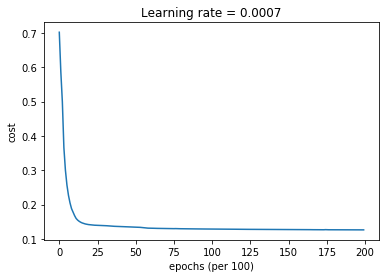

In [6]:
moons_nn.fit_binary(layer_dimensions = [2, 5, 2, 1],
                    optimizer = "adam",
                    learning_rate = 0.0007,
                    num_epochs = 20000)

## Training Set Performance

In [8]:
pred_train = moons_nn.predict_binary(X = X_train, y = y_train)

Accuracy: 0.9400000000000002


In [9]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.94
Recall: 0.94


In [10]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.47,0.03
label: 1,0.03,0.47
